# Exploring Support Vector Machines

**NOTE: For this example, we will explore the algorithm, so we'll skip scaling and also skip a train\test split and instead see how the various parameters can change an SVM (easiest to visualize the effects in classification)**

[Link to a great Paper on SVM](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4448154647BC7B10C991CEF2236BBA38?doi=10.1.1.114.4288&rep=rep1&type=pdf)
* A tutorial on support vector regression by ALEX J. SMOLA and BERNHARD SCHOLKOPF

## SVM - Classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data
​
The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.
​
You will notice the groups are very separable, this is on purpose, to explore how the various parameters of an SVM model behave.

In [3]:
df=pd.read_csv("D:\\Study\\Programming\\python\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\01 - Introduction to Course\\1UNZIP-FOR-NOTEBOOKS-FINAL\\DATA\\mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

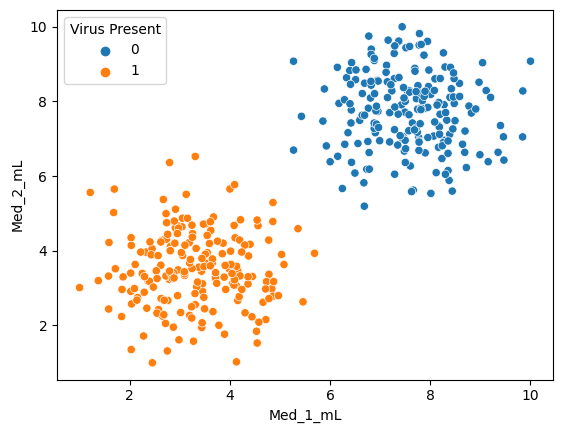

In [7]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df);

## Separating Hyperplane

Our goal with SVM is to create the best separating hyperplane. In 2 dimensions, this is simply a line.

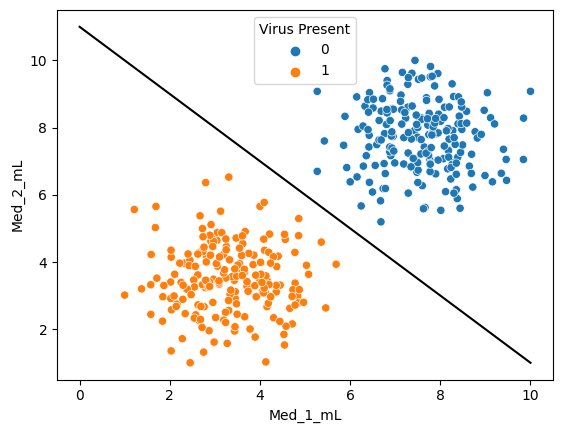

In [20]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df);

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x=np.linspace(0,10,100)

m=-1
b= 11 # ( b is the point where it cuts y-axis)
y=m*x + b
plt.plot(x,y,'black')

## SVM - Support Vector Machine

In [21]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [22]:
# help(SVC)

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**

In [24]:
X=df.drop('Virus Present',axis=1)
y=df['Virus Present']

In [25]:
model = SVC (kernel='linear',C=1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [26]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


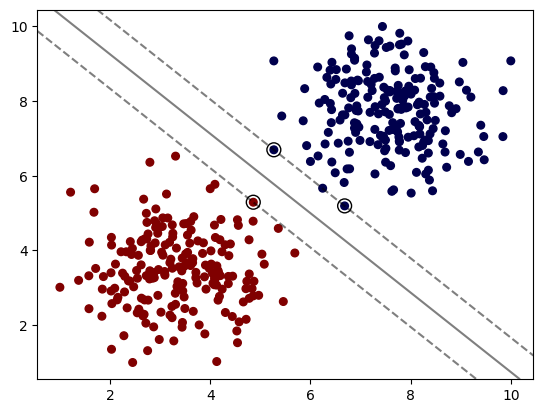

In [27]:
plot_svm_boundary(model,X,y)

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

In [37]:
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


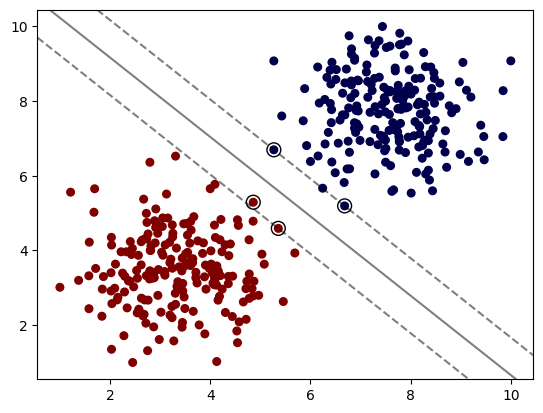

In [38]:
plot_svm_boundary(model,X,y)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


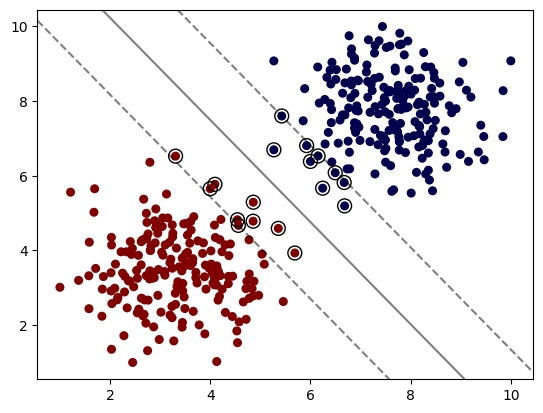

In [43]:
# As the value of C decreases we get more and more point go in the margin
# By decreasing the value of C we are making margin softer and softer
model=SVC(kernel='linear', C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


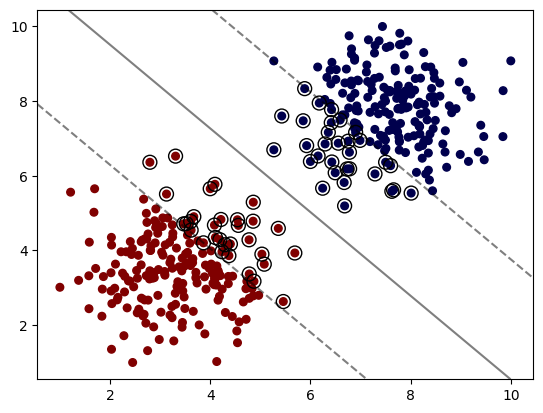

In [42]:
model=SVC(kernel='linear', C=0.005)
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


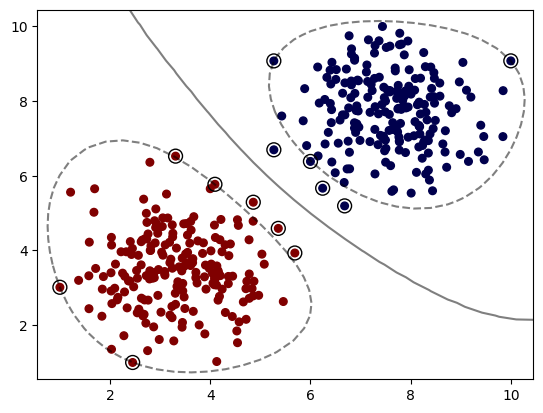

In [36]:
model = SVC(kernel='rbf', C=1) # Ratio basis function
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


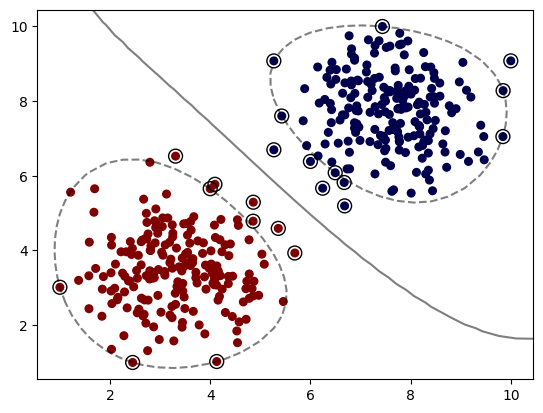

In [45]:
model = SVC(kernel='rbf', C=.5) # Ratio basis function
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


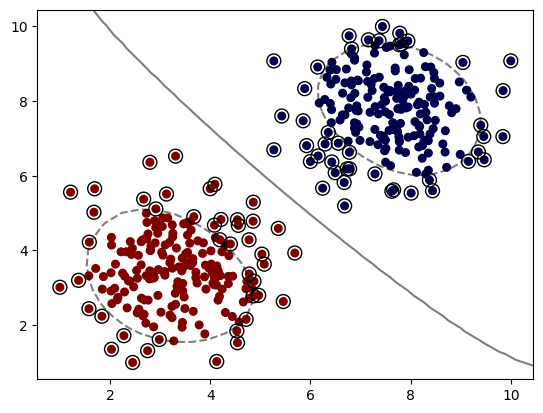

In [46]:
model = SVC(kernel='rbf', C=.05) # Ratio basis function
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


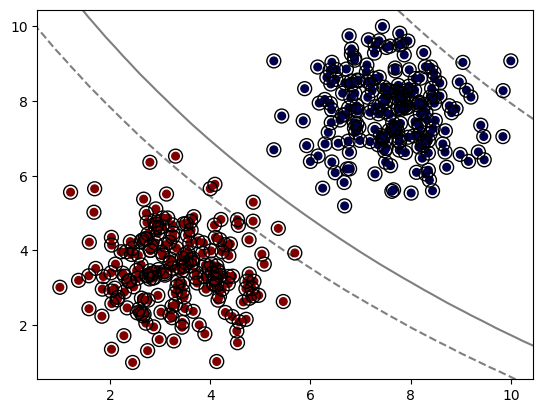

In [44]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


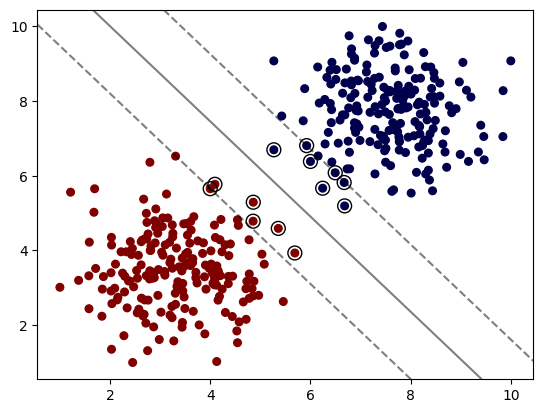

In [52]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


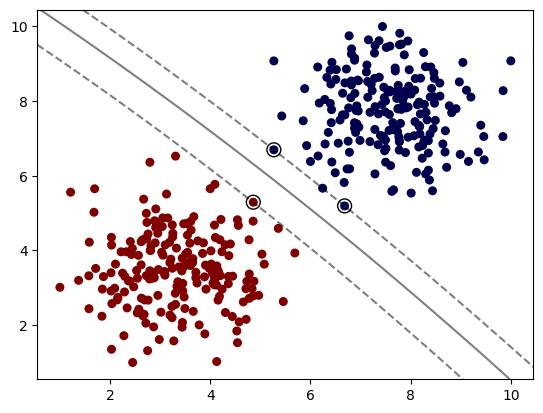

In [57]:
# As we increase degree more and more that our support line get curve
model= SVC(kernel='poly',degree=4,C=.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


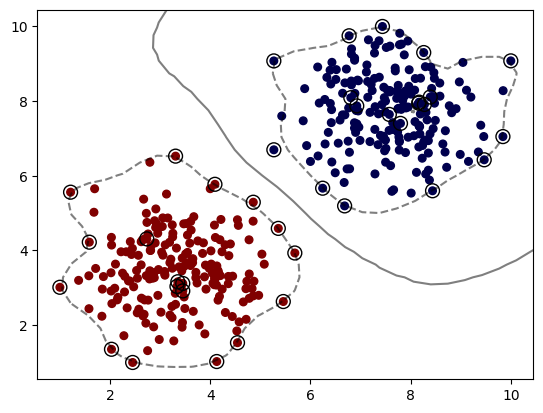

In [48]:
model = SVC(kernel='rbf', C=1,gamma='auto')
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


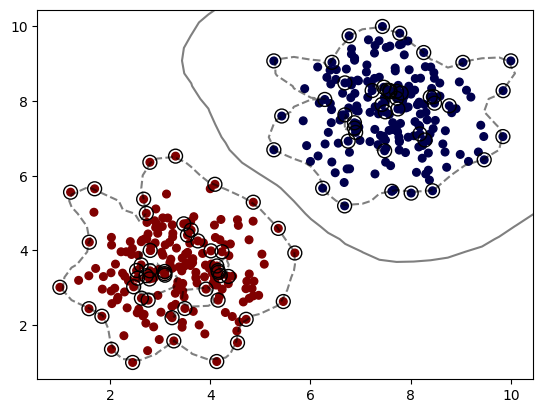

In [50]:
model = SVC(kernel='rbf', C=1,gamma=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


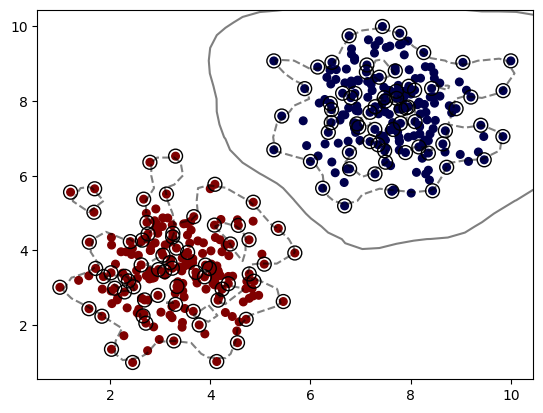

In [51]:
model = SVC(kernel='rbf', C=1,gamma=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [60]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [62]:
# 100% accuracy (as expected)
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [63]:
# 100% accuracy (as expected)
grid.best_score_

1.0

This is more to review the grid search process, recall in a real situation such as your exercise, you will perform a train|test split and get final evaluation metrics.

----
# SVM - Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

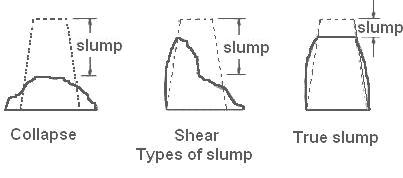

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

In [4]:
df = pd.read_csv("D:\\Study\Programming\\python\\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\01 - Introduction to Course\\1UNZIP-FOR-NOTEBOOKS-FINAL\\DATA\\cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot: >

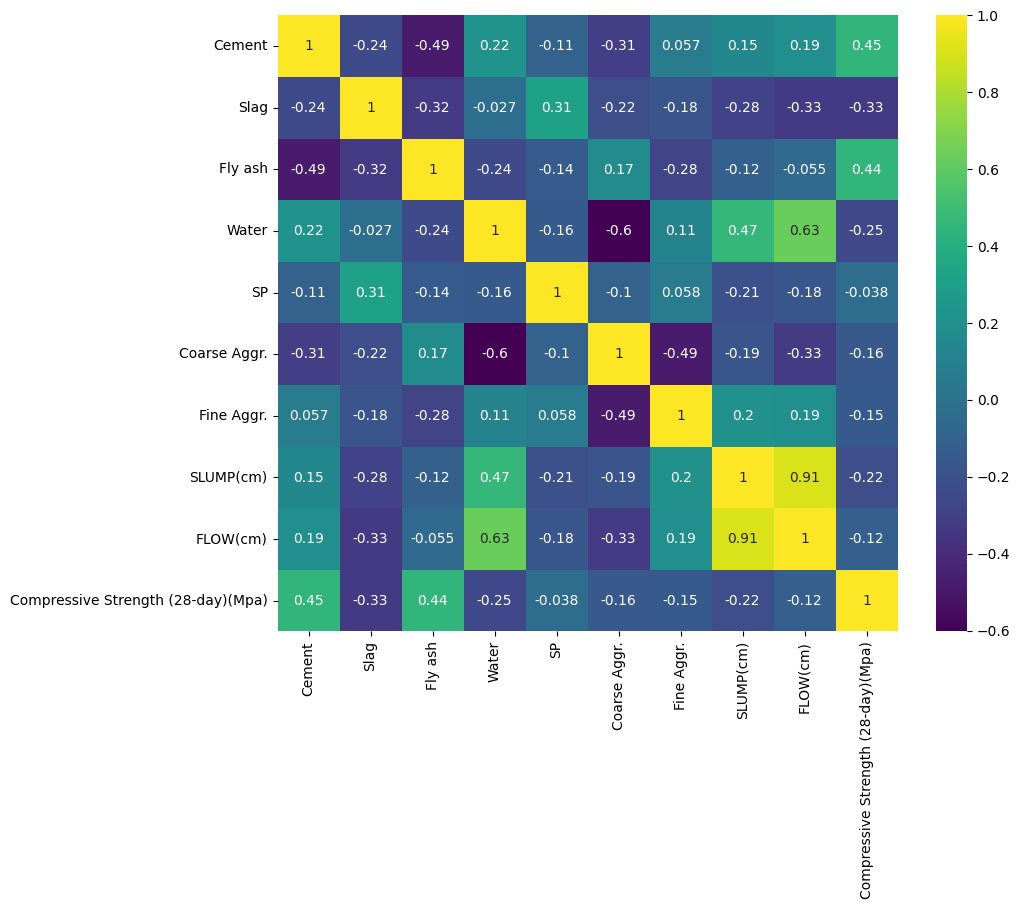

In [14]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [7]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

## Train | Test Split

Alternatively you could also set this up as a pipline, something like:

    >>> from sklearn.pipeline import make_pipeline
    >>> from sklearn.preprocessing import StandardScaler
    >>> from sklearn.svm import SVR

    >>> clf = make_pipeline(StandardScaler(), SVR())

In [9]:
X= df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y= df['Compressive Strength (28-day)(Mpa)']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
scaler_x_train = scaler.fit_transform(X_train) 
scaler_x_test = scaler.fit_transform(X_test)

## Support Vector Machines - Regression

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.

In [33]:
from sklearn.svm import SVR, LinearSVR

Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

In [34]:
base_model = SVR()

In [35]:
base_model.fit(scaler_x_train,y_train)

SVR()

In [36]:
base_preds = base_model.predict(scaler_x_test)

## Evaluation

In [37]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [38]:
mean_absolute_error(y_test,base_preds)

5.168789741025255

In [40]:
y_test.mean()

36.26870967741935

In [41]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.750129049373485

## Grid Search in Attempt for Better Model

In [42]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
             'gamma':['scale','auto'],
             'degree':[2,3,4],
             'epsilon':[0,0.01,0.1,0.5,1,2]}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [45]:
grid.fit(scaler_x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [46]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [49]:
grid_pred=grid.predict(scaler_x_test)

In [50]:
mean_absolute_error(y_test,grid_pred)

2.802170403491858

In [51]:
np.sqrt(mean_squared_error(y_test,grid_pred))

3.7329013020125363

Great improvement!